In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
import statsmodels.formula.api as sm
from scipy.stats import norm, skew
import scipy.stats as stats
%matplotlib inline

In [226]:
train = pd.read_csv('../../../Data/train.csv')
test = pd.read_csv('../../../Data/test.csv')

In [227]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [228]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [229]:
train.shape

(1460, 81)

In [230]:
test.shape

(1459, 80)

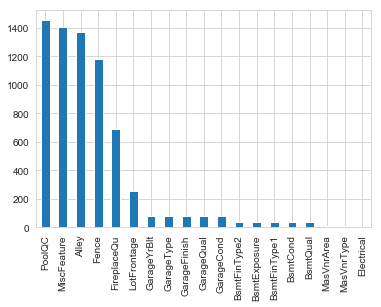

In [231]:
sns.set_style("whitegrid")
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending = False,inplace=True)
missing.plot.bar()

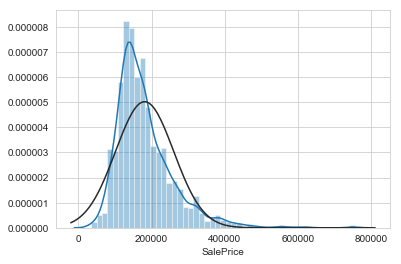

In [232]:
sns.distplot(train['SalePrice'], fit = stats.norm)

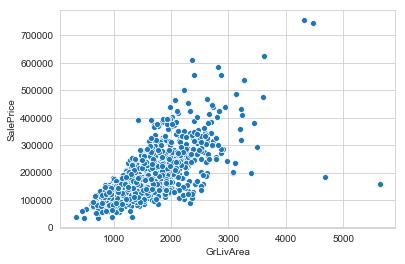

In [233]:
sns.scatterplot(x = train['GrLivArea'],y = train['SalePrice'])

In [234]:
train = train.drop(train[(train['GrLivArea']>4500) & (train['SalePrice']<300000)].index)

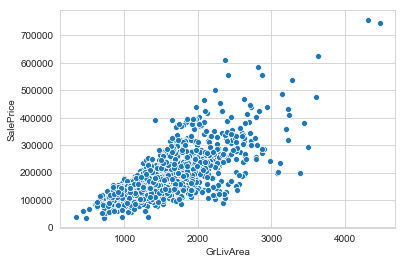

In [235]:
sns.scatterplot(y = train['SalePrice'], x = train['GrLivArea'])

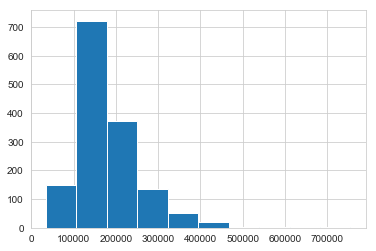

In [236]:
train['SalePrice'].hist()

In [237]:
train['SalePrice'] = np.log1p(train['SalePrice'])

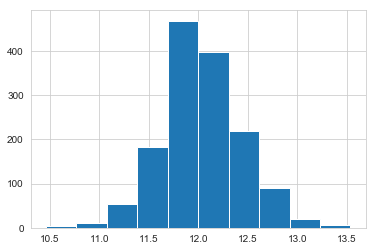

In [238]:
train['SalePrice'].hist()

In [239]:
train_features = train.drop('SalePrice', axis = 1)
y = train['SalePrice'].reset_index(drop=True)
test_features = test
features = pd.concat([train_features, test_features]).reset_index(drop= True)

In [240]:
features.shape

(2917, 80)

In [241]:
features.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


Convert Year Variables to strings

In [242]:
for i in ['MSSubClass', 'YrSold', 'MoSold']:
    features[i] = features[i].apply(lambda x: str(x))

In [243]:
def missing_vals(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (total/len(df)*100)
    missing = percent[percent>0]
    return pd.DataFrame( missing, columns = ['Percent'])

In [244]:
missing_vals(features)

,Percent
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageCond,5.450806
GarageQual,5.450806
GarageYrBlt,5.450806
GarageFinish,5.450806


- Electrical, KitchenQual has one Na values and Functional has two Na values. The Na values was therefore set to the Mode

In [245]:
for i in 'Functional Electrical KitchenQual'.split():
    features[i] = features[i].fillna(features[i].mode()[0])

- PoolQC ,MiscFeature, Alley, Fence, FireplaceQu 

In [246]:
for i in 'PoolQC MiscFeature Alley Fence FireplaceQu'.split():
    features[i] = features[i].fillna('None')

- LotFrontage : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood.

In [247]:
features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

- GarageType, GarageFinish, GarageQual ,GarageCond are all categorical values and because there is more than one missing value in all of them, the Na value is replaced with None

In [248]:
for i in 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'.split():
    features[i] = features[i].fillna('None')

- The missing values are replaced with 0 because if GarageYrBlt, GarageArea, GarageCars, are 0 and numerical featuresit means that there is no garage


In [249]:
for i in 'GarageYrBlt', 'GarageArea', 'GarageCars'.split():
    features[i] = features[i].fillna(0)

- If any of the numerical Basement variables are zero, it means there is simply no Basement

In [250]:
for i in 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'.split():
    features[i] = features[i].fillna(0)

- If any of the categorical variables for Basement is zero, it means there is simply no Basement

In [251]:
for i in 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'.split():
    features[i] = features[i].fillna('None')

- If there is missing vals in the Masonary category, it simply means no masonary is part of the house, the categorical variable (MasVnrType) is set to None and the numerical variable (MasVnrArea) is set to 0

In [252]:
features["MasVnrType"] = features["MasVnrType"].fillna("None")
features["MasVnrArea"] = features["MasVnrArea"].fillna(0)

- There are 4 missing values in MSZoning, therefore because it is a categorical values, it is set to the mode

In [253]:
features['MSZoning'] = features['MSZoning'].fillna(features['MSZoning'].mode()[0])

- Exterior1, Exterior2 and SaleType has 1 missing value, and because it is a categorical value, it will be set to the mode

In [254]:
for i in 'Exterior1st Exterior2nd SaleType'.split():
    features[i] = features[i].fillna(features[i].mode()[0])

- MSSubClass has one missing value, it will be set to None

In [255]:
features['MSSubClass'] = features['MSSubClass'].fillna("None")

- Utilities, street and PoolQc is dropped because most houses does not have a Pool, and because the only Feature in Utilities are all AllPub except for two, and street

In [257]:
features = features.drop(['Utilities', 'PoolQC'], axis=1)

Lets see if there is more missing values in the Dataset

In [258]:
missing_vals(features)

,Percent


- Some more Feature Engineering

In [262]:
features['YrBuiltandRemod'] = features['YearBuilt']+features['YearRemodAdd']

In [263]:
features['TotSqrSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

In [264]:
features['Haspool'] = features['PoolArea'].apply(lambda x: 1 if x> 0 else 0)
features['HasFireplace'] = features['Fireplaces'].apply(lambda x: 1 if x> 0 else 0)
features['HasGarage'] = features['GarageArea'].apply(lambda x: 1 if x> 0 else 0)
features['HasBsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x> 0 else 0)
features['Has2ndFloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x> 0 else 0)

In [268]:
num_features = features.select_dtypes(include = np.number).index

# Check the skew of all numerical features
skewed_feats = features[num_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(15)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
Haspool,15.494756
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [269]:
features = pd.get_dummies(features)
features.shape

(2917, 333)

In [275]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [286]:
X = features.iloc[:len(y), :].copy()
X_sub = features.iloc[len(y):, :].copy()
X.shape, y.shape, X_sub.shape

((1458, 333), (1458,), (1459, 333))